<a href="https://colab.research.google.com/github/aravindskumar98/DL/blob/main/FeedForwardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
## device confid
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# hyper parameters
input_size = 28*28 #image size for MNIST
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [5]:
train_dataset = torchvision.datasets.MNIST(root='./data',train = True, transform = transforms.ToTensor(),download=True) ##stores it at a place
test_dataset = torchvision.datasets.MNIST(root='./data',train = False, transform = transforms.ToTensor(),download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size, shuffle = True) ## shuffle good for training | irrelevant for testing
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size, shuffle = False)

examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [9]:
##[batch_size, no_of_color_channels, row, cols]

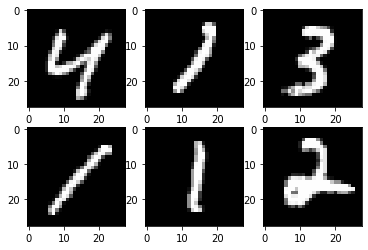

In [18]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap = 'gray')
plt.show()

In [20]:
class NeuralNet(nn.Module):
  def __init__(self, input, hidden, num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input,hidden)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden,num_classes)
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    ##no softmax since cross entropy loss
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device) ## very important!!

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

## training_loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    ## reshape the images to be 1D
    ## 100,1,28,28 ---> 100,784
    images = images.reshape(-1,28*28).to(device) ##--> move to device!
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs,labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100==0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# test 
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index is returned
    _,predictions = torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=(predictions == labels).sum().item() 

acc = 100.0*n_correct/n_samples

print("accuracy", acc)


epoch 1/2, step 100/600, loss = 0.3115
epoch 1/2, step 200/600, loss = 0.3047
epoch 1/2, step 300/600, loss = 0.3532
epoch 1/2, step 400/600, loss = 0.2813
epoch 1/2, step 500/600, loss = 0.2558
epoch 1/2, step 600/600, loss = 0.2212
epoch 2/2, step 100/600, loss = 0.3111
epoch 2/2, step 200/600, loss = 0.1390
epoch 2/2, step 300/600, loss = 0.1448
epoch 2/2, step 400/600, loss = 0.2195
epoch 2/2, step 500/600, loss = 0.2337
epoch 2/2, step 600/600, loss = 0.1718
accuracy 95.48
